# Dynamic Latent Variable Models



### Preliminaries

- Goal 
  - Introduction to dynamic (=temporal) Latent Variable Models, including the Hidden Markov Model and Kalman filter.   
- Materials
  - Mandatory
    - These lecture notes
  - Optional 
    - Bishop pp.605-615 on Hidden Markov Models
    - Bishop pp.635-641 on Kalman filters
    - Faragher (2012), [Understanding the Basis of the Kalman Filter](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf), and [video](http://www.brainshark.com/brainshark/brainshark.net/salesportal/title.aspx?pi=zCJz8Qu7fz0z0) 
    - Minka (1999), [From Hidden Markov Models to Linear Dynamical Systems](./files/Minka-1999-from-HMM-to-LDS.pdf)
      


### Example Problem

- <span class="exercise">We consider a one-dimensional cart position tracking problem, see</span>  [Faragher 2012](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf).  

- <span class="exercise">The hidden states are the position $z_t$ and velocity $\dot z_t$. We can apply an external acceleration/breaking force $u_t$. (Noisy) observations are represented by $x_t$.</span> 

- <span class="exercise">The equations of motions are given by</span>

$$\begin{align*}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
x_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x) 
\end{align*}$$

- <span class="exercise">Infer the position after 10 time steps.</span> 

<img src="./figures/Faragher-2012-cart-1.png" width="600px">


### Dynamical Models

- In this lesson, we consider models where the sequence order of observations matters. 

- Consider the _ordered_ observation sequence $$x^N \triangleq \left(x_1,x_2,\ldots,x_N\right)\,.$$

- We wish to develop a generative model
    $$ p( x^N \,|\, \theta)$$
that 'explains' the time series $x^N$.

- We cannot use the IID assumption $p( x^N  | \theta) = \prod_n p(x_n \,|\, \theta)$. In general, we _can_ use the [**chain rule**](https://en.wikipedia.org/wiki/Chain_rule_(probability) (a.k.a. the general product rule)

$$\begin{align*}
p(x^N) &= p(x_N|x^{N-1}) \,p(x^{N-1}) \\
  &=  p(x_N|x^{N-1}) \,p(x_{N-1}|x^{N-2}) \cdots p(x_2|x_1)\,p(x_1) \\
  &= p(x_1)\prod_{n=2}^N p(x_n\,|\,x^{n-1})
\end{align*}$$

- Generally, we will want to limit the depth of dependencies on previous observations. For example, the $M$th-order linear **Auto-Regressive** (AR) model
    $$\begin{align*}
  p(x_n|x^{n-1}) = \mathcal{N}\left( \sum_{m=1}^M a_m x_{n-m}\,,\sigma^2\,\right)  
    \end{align*}$$
    limits the dependencies to the past $M$ samples.


### State-space Models

- A limitation of AR models is that they need a lot of parameters in order to create a flexible model. E.g., if $x_n$ is an $K$-dimensional discrete variable, then an $M$th-order AR model will have $K^{M-1}(K-1)$ parameters. 

- Similarly to Gaussian Mixture models and latent Factor models, we can create a flexible dynamic system by introducing _latent_ (unobserved) variables  $z^N \triangleq \left(z_1,z_2,\dots,z_N\right)$ (one $z_n$ for each observation $x_n$). In dynamic systems, the latent variables $z_n$ are usually called _state variables_.

- A general **state space model** is defined by
$$\begin{align*}
    \text{a state transition model}:&\,\, p(z_n\,|\,z^{n-1}) \,,  \\
    \text{an observation model}:&\,\, p(x_n\,|\,z_n) \,,  \\
    \text{and an initial state}:&\,\, p(z_1) 
\end{align*}$$

- A very common computational assumption is to let state transitions be ruled by a _first-order Markov chain_ as
$$
 p(z_n\,|\,z^{n-1}) = p(z_n\,|\,z_{n-1})
$$

- The Markov assumption leads to the following joint probability distribution for the state-space model:
$$
 p(x^N,z^N) = \underbrace{p(z_1)}_{\text{initial state}} \prod_{n=2}^N \underbrace{p(z_n\,|\,z_{n-1})}_{\text{state transitions}}\,\prod_{n=1}^N \underbrace{p(x_n\,|\,z_n)}_{\text{observations}}
$$

- The Forney-style factor graph for a state-space model:

<img src="./figures/ffg-state-space.png" width="600px">

- <span class="exercise">Exercise: Show that in a state-space model $x_n$ is not a first-order Markov chain in the observations, i.e., show that $$p(x_n\,|\,x_{n-1},x_{n-2}) \neq p(x_n\,|\,x_{n-1})\,.$$</span>



### Hidden Markov Models, Kalman filters etc.

- A **Hidden Markov Model** (HMM) is a state-space model with <span class="emphasis">discrete-valued</span> state variables $Z_n$.
  - E.g., $Z_n$ is a $K$-dimensional hidden binary 'class indicator' with transition probabilities $A_{jk} \triangleq p(z_{nk}=1\,|\,z_{n-1,j}=1)$, or equivalently
  $$p(z_n|z_{n-1}) = \prod_{k=1}^K \prod_{j=1}^K A_{jk}^{z_{n-1,j}z_{nk}}$$
which is usually accompanied by an initial state distribution $\pi_k \triangleq p(z_{1k}=1)$.
  - The classical HMM has also discrete-valued observations but in pratice any (probabilistic) observation model $p(x_n|z_n)$ may be coupled to the hidden Markov chain. 
  
<img src="./figures/Figure13.7.png" width="500px">

- Another well-known state-space model with <span class="emphasis">continuous-valued</span> state variables $Z_n$ is the **(Linear) Dynamical System** (LDS), which is defined as

$$\begin{align*}
p(z_n\,|\,z_{n-1}) &= \mathcal{N}\left(\, A z_{n-1}\,,\,\Sigma_z\,\right) \\ 
p(x_n\,|\,z_n) &= \mathcal{N}\left(\, C z_n\,,\,\Sigma_x\,\right) \\
p(z_1) &= \mathcal{N}\left(\, \mu_1\,,\,\Sigma_1\,\right)
\end{align*}$$
<!---or, equivalently (in the usual state-space notation)
$$\begin{align*}
z_k &= A z_{k-1} + \mathcal{N}\left(0,\Sigma_z \right) \\ 
x_k &= C z_k + \mathcal{N}\left( 0, \Sigma_x \right) \\
z_1 &= \mu_1 + \mathcal{N}\left( 0, \Sigma_1\right)
\end{align*}$$
--->

- Note that the joint distribution over $\{x_1,z_1,\ldots,x_n,z_n\}$ is a (large-dimensional) Gaussian distribution. This means that, in principle, every inference problem on the generative model also leads to a Gaussian distribution.

- Technically, a [**Kalman filter**](https://en.wikipedia.org/wiki/Kalman_filter) is the solution to the recursive estimation (=inference) of the hidden state $z_n$ based on past observations in an LDS, i.e., Kalman filtering solves the problem $p(z_n\,|\,x^n)$ based on the previous estimate $p(z_{n-1}\,|\,x^{n-1})$ and a new observation $x_n$ (given the generative model specification). 

- Kalman filtering and hidden Markov models (and variants thereof) are at the basis of a wide range of complex information processing systems, such as speech and language recognition, robotics and automatic car navigation, and even processing of DNA sequences.    

### Message Passing in State-space Models

- Once the (state-space) models have been specified, we can define state and parameter estimation problems as inference tasks on the generative model. 

- In principle, for linear Gaussian models these inference tasks can be analytically solved, see e.g. [Faragher, 2012](./files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf) 
  - These derivations quickly become quite laborious  

- Alternatively, we could specify the generative model in a (Forney-style) factor graph and use automated message passing to infer the posterior over the hidden variables. E.g., the message passing schedule for Kalman filtering looks like this: 

<img src="./figures/ffg-state-space-with-state-estimation.png" width="600">

### Example Problem Revisited

We can solve the cart tracking problem by sum-product message passing in a factor graph like the one depicted above. All we have to do is create factor nodes for the state-transition model $p(z_t|z_{t-1})$ and the observation model $p(x_t|z_t)$. Then we just build the factor graph and let ForneyLab (factor graph toolbox) perform message passing. 

We'll implement the following model:

$$\begin{align*}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
\mathbf{x}_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x)
\end{align*}$$

In [1]:
include("scripts/cart_tracking_helpers.jl") # implements required factor nodes + helper functions

# Specify the model parameters
Δt = 1.0                     # assume the time steps to be equal in size
A = [1.0 Δt;
     0.0 1.0]
b = [0.5*Δt^2; Δt] 
Σz = diagm([0.2*Δt; 0.1*Δt]) # process noise covariance
Σx = diagm([1.0; 2.0])       # observation noise covariance;

# Generate noisy observations
n = 10                # perform 10 timesteps
z_start = [10.0; 2.0] # initial state
u = 0.2 * ones(n)     # constant input u
noisy_x = generateNoisyMeasurements(z_start, u, A, b, Σz, Σx);

Since the factor graph is just a concatination of $n$ identical "sections", we only have to specify a single section, and ForneyLab will automatically build a 'virtual' factor graph consisting of $n$ sections. Let's build a section of the factor graph:

In [2]:
fg = FactorGraph()
n_z_old      = TerminalNode(vague(MvGaussian{2}), id=:z_old)       # terminal for z[t-1]
n_z_new      = TerminalNode(vague(MvGaussian{2}), id=:z_new)       # terminal for z[t]
n_u          = TerminalNode(vague(Gaussian), id=:u)                # terminal for u[t]
n_x          = TerminalNode(MvDelta(zeros(2)), id=:x)              # terminal for u[t]
n_transition = LinearTransitionModelNode(A=A, b=b, Σ=Σz, id=:transition_model) # node p(z_new|z_old,u;A,b,Σ)
n_equality   = EqualityNode()
n_obs        = GaussianNode(V=Σx, id=:observation_model)                       # node p(x|z)

Edge(n_z_old, n_transition.i[:z_old])
Edge(n_u, n_transition.i[:u])
Edge(n_transition.i[:z_new], n_equality.i[1])
Edge(n_equality.i[2], n_obs.i[:mean])
Edge(n_obs.i[:out], n_x)
Edge(n_equality.i[3], n_z_new)

Wrap(n_z_new, n_z_old) # Tell ForneyLab how to concatinate the sections
# draw(fg);

Now that we've built the factor graph, we can perform Kalman filtering by inserting measurement data into the factor graph and performing message passing.

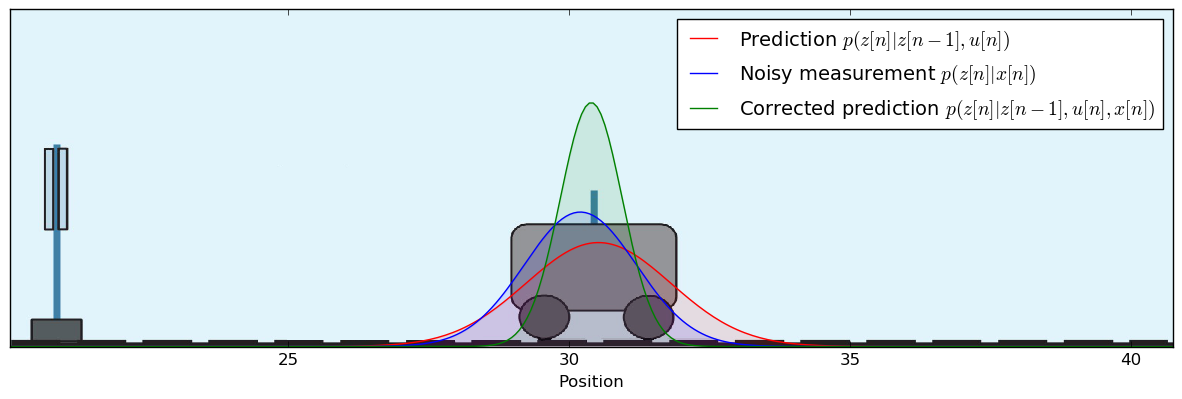

In [3]:
# Insert data into graph, perform message-passing
attachReadBuffer(n_u, map(Gaussian, u))      # insert values of u into terminal node n_u
attachReadBuffer(n_x, map(MvDelta, noisy_x)) # insert the noisy measurements into terminal node n_x
run(SumProduct()) # Perform sum-product message passing

# Collect prediction p(z[n]|z[n-1]), measurement p(z[n]|x[n]), corrected prediction p(z[n]|z[n-1],x[n])
prediction      = n_transition.i[:z_new].message.payload
measurement     = n_obs.i[:mean].message.payload
corr_prediction = n_equality.i[3].message.payload

# Make a fancy plot of the prediction, noisy measurement, and corrected prediction after n timesteps
plotCartPrediction(prediction, measurement, corr_prediction);

### Extensions

<img src="./figures/fig-generative-Gaussian-models.png" width="550px">

-----
_The cell below loads the style file_

In [4]:
open("../../styles/aipstyle.html") do f
    display("text/html", readstring(f))
end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->